#**Analyse Product Reviews By Shopers**

Data Set: https://www.kaggle.com/datafiniti/grammar-and-online-product-reviews

You need to perform the following exercise on the given dataset.

1 Perform EDA and visualize the data to get some meaningful insights

2 Apply Unsupervised Learning on review texts

3 Supervised Machine learning model to predict ratings

4 Evaluate your supervised machine learning model

5 Also, find the following insights:

6 Find Shoppers satisfaction

7 Find Frequent words in reviews

8 Find the most popular product that shoppers have purchased

9 Find 3 reasons in top-rated comments why people liked it. (Hint: Frequent Words, Topic Modeling)

**NAME => SOMESH-JOSHI**

**ROLL-NO => DS7B-2117**

**M-TECH (BIG DATA ANALYTICS)**

**Note == Please refer "Analysis - Summary" section for Insights mentioned in Table of Contents.**

##**IMPORTING LIBRARIES**##

In [1]:
import pandas 
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


##**READING DATA**##

In [2]:
data=pandas.read_csv("/content/drive/MyDrive/ProductReviews.csv")
data.shape

(71044, 25)

In [3]:
data.head(10)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   
5  AV16khLE-jtxr-f38VFn              K-Y   
6  AV16khLE-jtxr-f38VFn              K-Y   
7  AV16khLE-jtxr-f38VFn              K-Y   
8  AV16khLE-jtxr-f38VFn              K-Y   
9  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories             dateAdded  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...  2017-07-25T00:52:42Z   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   
5  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   
6  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   
7  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   
8  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   
9  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   

            dateUpdated          ean  \
0  2018-02-05T08:36:58Z     6.03E+11   
1  2018-02-05T11:27:45Z  73416000391   
2  2018-02-05T11:27:45Z  73416000391   
3  2018-02-05T11:25:51Z  67981934427   
4  2018-02-05T11:25:51Z  67981934427   
5  2018-02-05T11:25:51Z  67981934427   
6  2018-02-05T11:25:51Z  67981934427   
7  2018-02-05T11:25:51Z  67981934427   
8  2018-02-05T11:25:51Z  67981934427   
9  2018-02-05T11:25:51Z  67981934427   

                                                keys  \
0  602537205981,universalmusic/14331328,universal...   
1  lundbergorganiccinnamontoastricecakes/b000fvzw...   
2  lundbergorganiccinnamontoastricecakes/b000fvzw...   
3  kylovesensualitypleasuregel/b00u2whx8s,0679819...   
4  kylovesensualitypleasuregel/b00u2whx8s,0679819...   
5  kylovesensualitypleasuregel/b00u2whx8s,0679819...   
6  kylovesensualitypleasuregel/b00u2whx8s,0679819...   
7  kylovesensualitypleasuregel/b00u2whx8s,0679819...   
8  kylovesensualitypleasuregel/b00u2whx8s,0679819...   
9  kylovesensualitypleasuregel/b00u2whx8s,0679819...   

                         manufacturer manufacturerNumber  \
0  Universal Music Group / Cash Money           14331328   
1                            Lundberg             574764   
2                            Lundberg             574764   
3                                 K-Y        67981934427   
4                                 K-Y        67981934427   
5                                 K-Y        67981934427   
6                                 K-Y        67981934427   
7                                 K-Y        67981934427   
8                                 K-Y        67981934427   
9                                 K-Y        67981934427   

                                         name  ...   reviews.id  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  ...          NaN   
1  Lundberg Organic Cinnamon Toast Rice Cakes  ...  100209113.0   
2  Lundberg Organic Cinnamon Toast Rice Cakes  ...  100209113.0   
3            K-Y Love Sensuality Pleasure Gel  ...  113026909.0   
4            K-Y Love Sensuality Pleasure Gel  ...  171267657.0   
5            K-Y Love Sensuality Pleasure Gel  ...  149773828.0   
6            K-Y Love Sensuality Pleasure Gel  ...  129088591.0   
7            K-Y Love Sensuality Pleasure Gel  ...  131769441.0   
8            K-Y Love Sensuality Pleasure Gel  ...  148314686.0   
9            K-Y Love Sensuality Pleasure Gel  ...  147862051.0   

  reviews.numHelpful reviews.rating  \
0                0.0              5   
1                NaN              5   
2                NaN              5   
3                NaN              1   
4                NaN     

##**EXPLORATORY DATA ANALYSIS**##

###**GENERAL EDA**###

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

In [5]:
data.isna().sum().sum()

296152

In [6]:
data.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

In [10]:
data['reviews.text'].isna().sum()

36

In [11]:
data.dropna(subset=['reviews.text'],inplace=True)

In [12]:
data['reviews.text'].isna().sum()

0

In [8]:
df=data['reviews.rating'].value_counts()
df

5    46543
4    14598
3     4369
1     3701
2     1833
Name: reviews.rating, dtype: int64

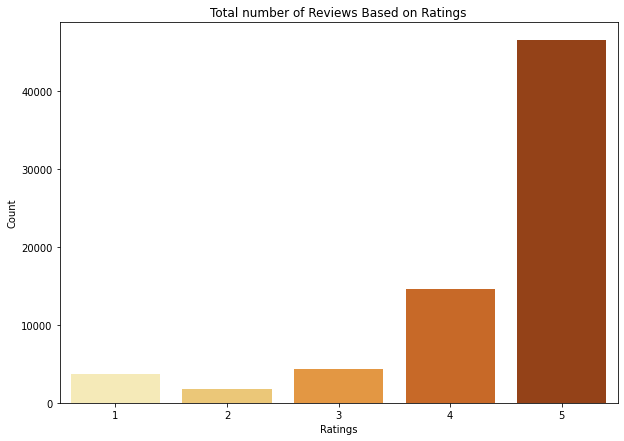

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.barplot(x=data['reviews.rating'].value_counts().index,y=data['reviews.rating'].value_counts().values,palette="YlOrBr")
plt.title('Total number of Reviews Based on Ratings')
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

In [16]:
data.dropna(subset=['reviews.title'],inplace=True)

In [17]:
df=data['reviews.title'].value_counts()

In [132]:
df.head(10)

Great movie      1367
Good movie        700
Great Product     585
Great Movie       559
Great             466
Great product     386
great movie       349
Awesome           332
Clorox Wipes      278
Good              229
Name: reviews.title, dtype: int64

In [18]:
da=data['reviews.title'].value_counts().head(10).index
da
db=data['reviews.title'].value_counts().head(10).values
db

array([1367,  700,  585,  559,  466,  386,  349,  332,  278,  229])

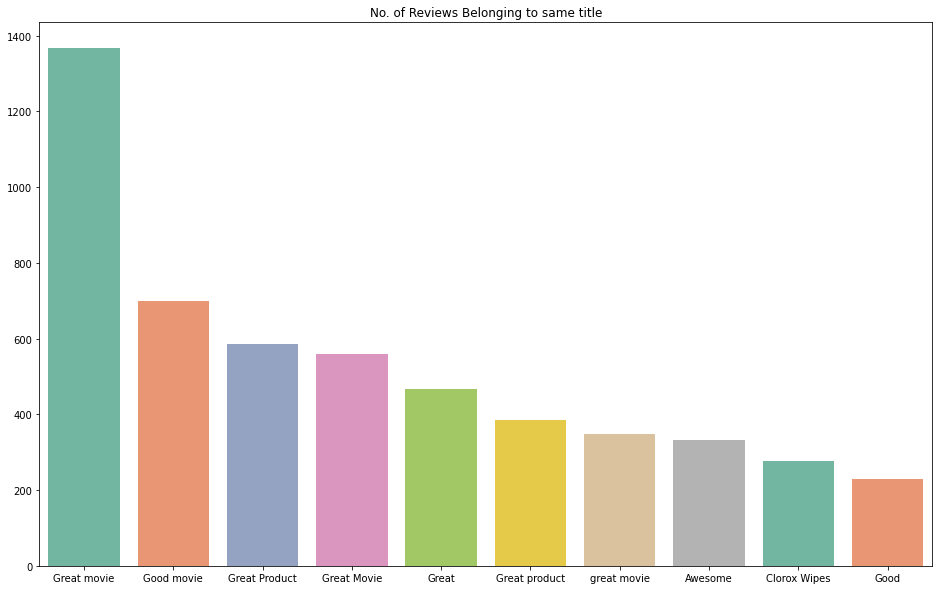

In [19]:
plt.figure(figsize = (16,10))
sns.barplot(x=da,y=db,palette='Set2')
plt.title('No. of Reviews Belonging to same title')
plt.show()

In [20]:
data['categories'].str.contains('Movies', regex=False).sum()

25405

In [21]:
data['categories'].str.contains('Food', regex=False).sum()

14742

In [22]:
data['categories'].str.contains('Packaged Foods', regex=True).sum()

2312

In [23]:
data['categories'].str.contains('Personal Care,Medicine Cabinet', regex=True).sum()

302

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


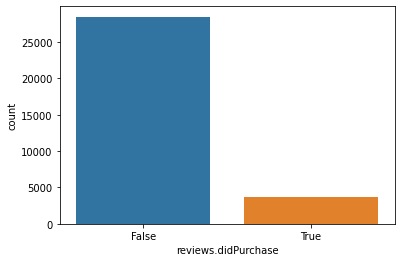

In [24]:
import seaborn as sns
sns.countplot(data['reviews.didPurchase'])          #reviews based on purchasing a product or not
plt.show()

# 3565 reviews are Genuine or valid (product purchase by customers)

# 29482 reviews are Not Genuine or Fake (product not purchase by customers)

# 37997 reviews are Nulls

In [25]:
dd=data['brand'].value_counts().sort_values(ascending=False)[:12].index
dd
dl=data['brand'].value_counts().sort_values(ascending=False)[:12].values
dl

array([10699,  6178,  5373,  4498,  3689,  3420,  3329,  2531,  2287,
        2161,  1939,  1919])

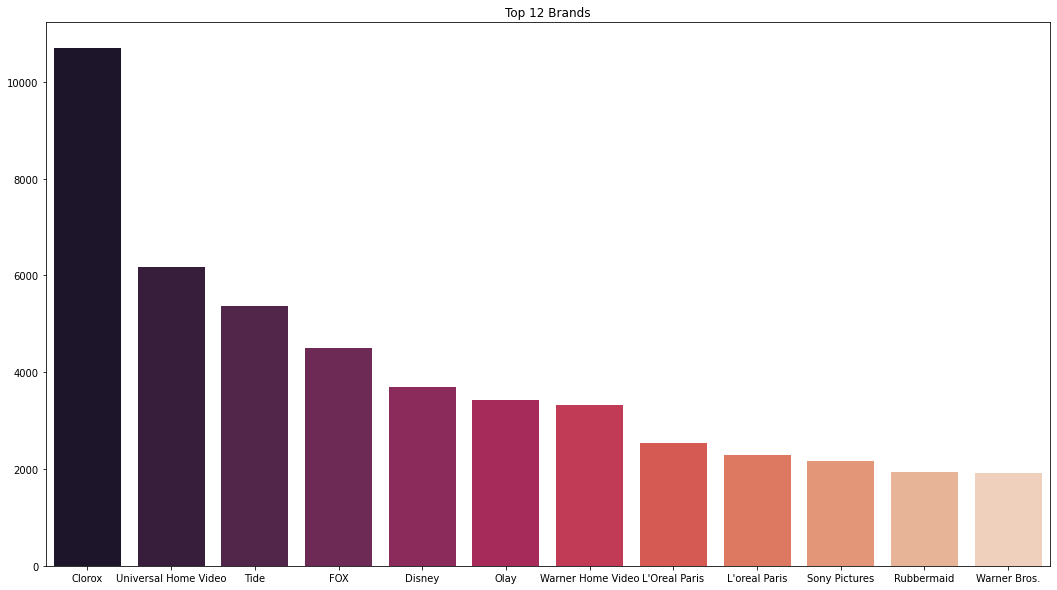

In [26]:
# Top 12 brands 

plt.figure(figsize = (18,10))
sns.barplot(x=dd,y=dl,palette="rocket")
plt.title('Top 12 Brands')
plt.show()

In [27]:
data.groupby('brand')['reviews.rating'].agg(['mean','count']).sort_values(by='count',ascending=False)[:15]

#Top brand avg rating and accurence of that particular brand

# "Clorox" brand having highest average rating and purchasing

mean  count
brand                                
Clorox                4.825404  10699
Universal Home Video  4.663807   6178
Tide                  4.168435   5373
FOX                   4.107603   4498
Disney                4.723231   3689
Olay                  4.193567   3420
Warner Home Video     4.349655   3329
L'Oreal Paris         4.384828   2531
L'oreal Paris         4.495409   2287
Sony Pictures         4.357242   2161
Rubbermaid            2.801444   1939
Warner Bros.          4.539343   1919
Quilted Northern      4.826268   1439
Lionsgate             4.740192   1351
Burt's Bees           4.630052    965

In [28]:
data.groupby('brand')['reviews.rating'].agg(['mean','count']).sort_values(by='count',ascending=True)[:25]

mean  count
brand                                 
iStarUSA                    3.0      1
Mill Creek                  5.0      1
National Mfg.               1.0      1
Cheez-It                    2.0      1
Newman's Own Organics       3.0      1
Carson-Dellosa Publishing   5.0      1
Noosa                       5.0      1
Nordicware                  1.0      1
Cal Lighting                4.0      1
Organic Root Stimulator     4.0      1
Gone Fishing                1.0      1
Pacific Natural Foods       5.0      1
Palladio                    5.0      1
Peak                        3.0      1
Pearhead                    4.0      1
Bosch                       5.0      1
Bodycology                  5.0      1
Body Fantasies              5.0      1
Citrus Magic                5.0      1
Black Radiance              5.0      1
Lucy's                      2.0      1
La Tortilla Factory         5.0      1
Fan Mats                    4.0      1
Haagen-Dazs                 5.0      1
Heinz                       5.0      1

In [29]:
data['review_length']  = data['reviews.text'].str.len()

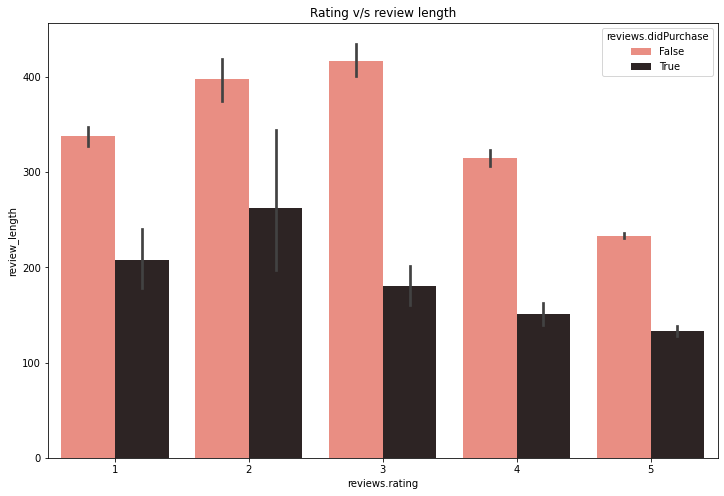

In [30]:
plt.figure(figsize=(12,8))
plt.title("Rating v/s review length")
sns.barplot(y="review_length", x="reviews.rating", data=data,hue="reviews.didPurchase",palette="dark:salmon_r")

# Reviews length according to rating given by users categorised by product purchase or not

# Rating 5 has smallest review length (brown bars)

# Rating 2 has largest review length (brown bars)

In [32]:
# Yeary wise reviews analysis

print(data['reviews.date'].str.contains('2015', regex=False).sum())
print(data['reviews.date'].str.contains('2016', regex=False).sum())
print(data['reviews.date'].str.contains('2017', regex=False).sum())
print(data['reviews.date'].str.contains('2018', regex=False).sum())

12000
18989
16020
7


In [34]:
#Splitting Date into year

data['date'] = data['dateAdded'].apply(lambda x: x.split('T')[0])
data['time'] = data['dateAdded'].apply(lambda x: x.split('T')[1])


In [36]:
data['year']=data['date'].apply(lambda x: x.split('-')[0])

In [37]:
data.head(3)
data['year'].count()

70544

In [81]:
data.groupby('reviews.didPurchase')['reviews.rating'].value_counts()


#In year 2015 maximum customers are satisfied 

reviews.didPurchase  reviews.rating
False                5                 19199
                     4                  4743
                     1                  2246
                     3                  1403
                     2                   876
True                 5                  2676
                     4                   596
                     3                   191
                     1                   128
                     2                    90
Name: reviews.rating, dtype: int64

In [79]:
data.groupby("year")['reviews.didPurchase'].value_counts()

#In 2015 14837 reviews are fake but the highest number of geniune reviews are also came in 2015.

year  reviews.didPurchase
2014  False                   1236
      True                     285
2015  False                  14837
      True                    1540
2016  False                   3113
      True                     450
2017  False                   9281
      True                    1406
Name: reviews.didPurchase, dtype: int64

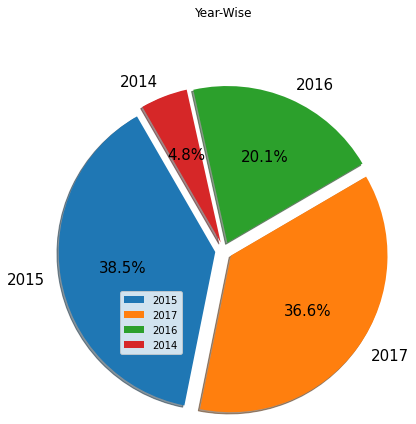

In [82]:

yy = data["year"].value_counts()
yc = data["year"].value_counts().index

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
textprops = {"fontsize":15}
explode = (0.1, 0.1, 0.1, 0.1)  
plt.pie(yy, labels=yc, explode=explode, textprops = textprops,colors=colors,autopct='%1.1f%%', shadow=True,radius = 1.8, startangle=120)

plt.title("Year-Wise",y=1.55)
plt.legend()

plt.show()

#year wise piechart

In [90]:
yy1=data['date'].value_counts(10)
yy1



2017-01-15    0.140494
2015-09-11    0.124263
2017-01-27    0.075556
2015-10-29    0.051174
2016-07-26    0.047190
                ...   
2015-04-27    0.000014
2017-01-11    0.000014
2015-05-27    0.000014
2015-11-03    0.000014
2016-10-27    0.000014
Name: date, Length: 175, dtype: float64

In [91]:
x = data["year"].value_counts().values
x

array([27164, 25805, 14155,  3420])

In [92]:
yy = data["year"].value_counts().index
yy

Index(['2015', '2017', '2016', '2014'], dtype='object')

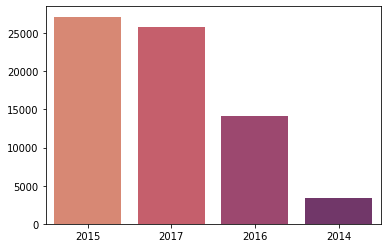

In [93]:
sns.barplot(x=yy,y=x,palette="flare")
plt.show()


In [94]:
d=data['id'].value_counts()
d.head(10)

AVpf3VOfilAPnD_xjpun    8605
AVpgOPJHLJeJML43KwSj    5510
AVpjDSAZLJeJML43rgNP    3609
AVph3agoilAPnD_x-Mv3    3488
AVpfPaoqLJeJML435Xk9    3329
AVphhorJilAPnD_x6cs7    2766
AVpgaPd61cnluZ0-1FvC    2489
AVpfW8y_LJeJML437ySW    2287
AVphoamL1cnluZ0-EojQ    2245
AVpfJP1C1cnluZ0-e3Xy    2093
Name: id, dtype: int64

In [95]:
data.groupby('id').count()
df_products = data.groupby('id').filter(lambda x: len(x) >= 1000)
df_product_groups = df_products.groupby('id')

#Count of products and groups
print(len(df_products))
print(len(df_product_groups))

45541
16


In [96]:
plt.figure(figsize=(18,16))
sns.countplot(y="id",  hue="reviews.rating", data=df_products);

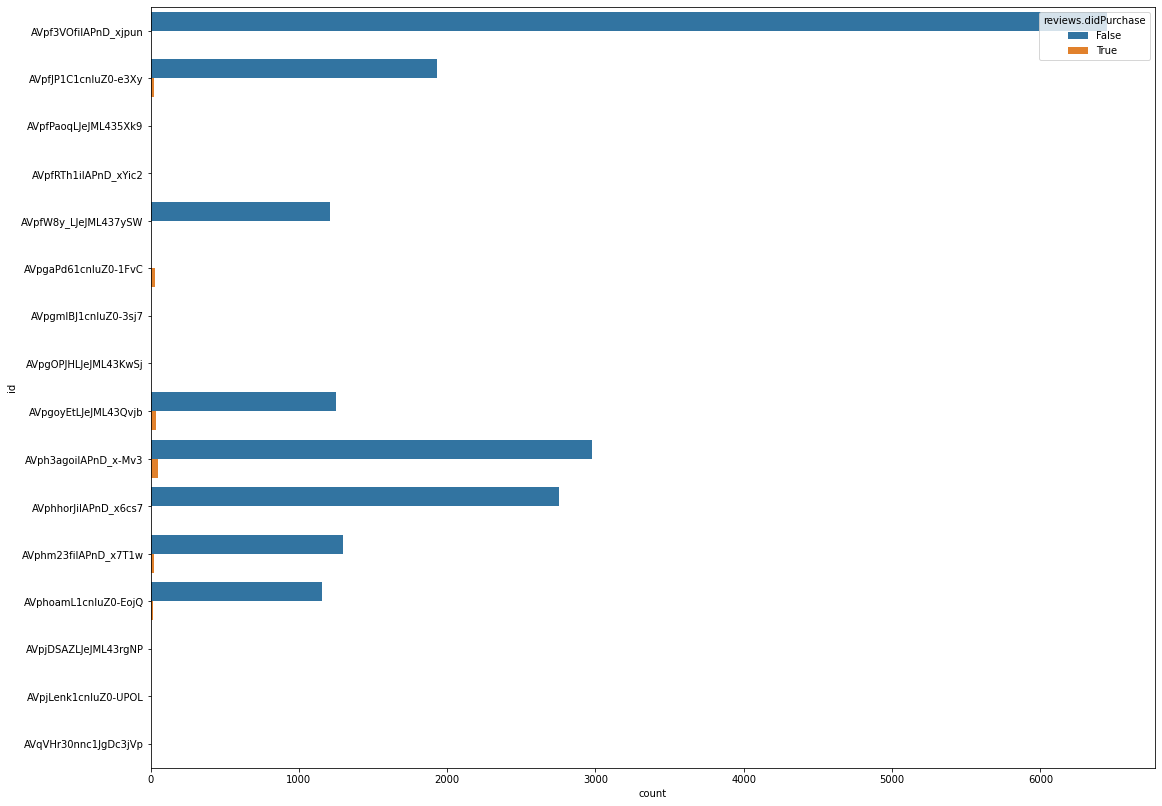

In [97]:
plt.figure(figsize=(18,14))
sns.countplot(y="id",  hue="reviews.didPurchase", data=df_products);

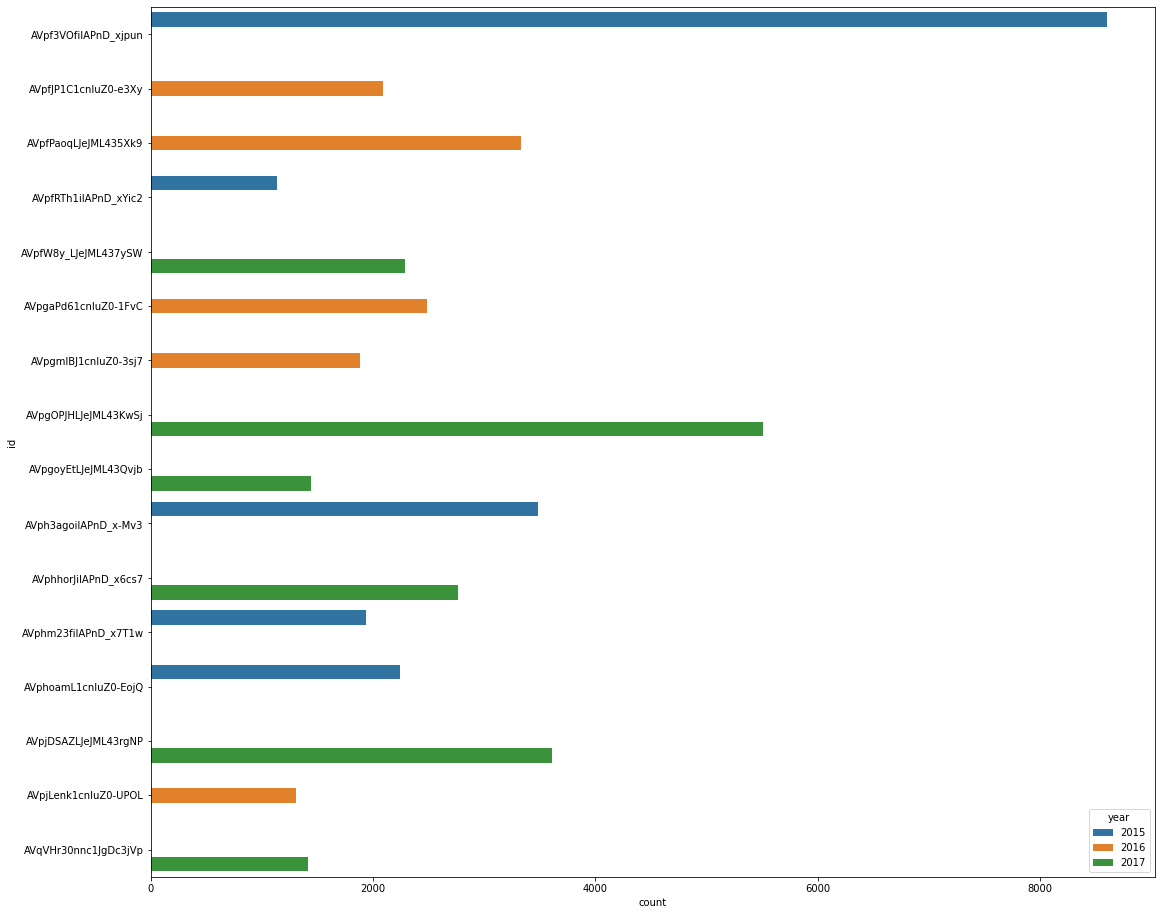

In [98]:
plt.figure(figsize=(18,16))
sns.countplot(y="id",  hue="year", data=df_products);

In [99]:
data['categories'].str.len().idxmax()

3682

In [101]:
data['categories'].loc[3682]

#Largestt category

'Home,Home Improvement,Electrical,Pro Audio,Power Equipment,Power Inverters,Auto & Tires,Auto Electronics,Automotive,Tools & Equipment,Jump Starters, Battery Chargers & Portable Power,Car Electronics,Cell Phones,Cell Phone Accessories,Cell Phone Batteries & Power,Portable Chargers/Power Packs,Consumer Electronics,Multipurpose Batteries & Power,Heavy-Duty Voltage Converters,Frys,Electronic Components,Electrical - Inverters,Holiday Shop,Electronics,Computers,Computer Accessories,video games,Generators,All Generators'

In [102]:
data['categories'].str.len().idxmin()

36881

In [103]:
data['categories'].loc[36881]

#smallest category

'Household Essentials,Air Fresheners'

In [104]:
pop=data[data['reviews.didPurchase']==True]
(pop['name'].value_counts().head(5))

#Most popular product purchased by customers

The Foodsaver174 10 Cup Fresh Container - Fac10-000                      477
Pantene Airspray Hairspray - 7 Oz                                        443
Hormel Chili, No Beans                                                    91
Coty Airspun Face Powder, Translucent Extra Coverage                      88
Just For Men Brush-In Color Gel For Mustache & Beard, Dark Brown M-45     80
Name: name, dtype: int64

###**EDA WITH NLP**###

####**Text Statistics**####

**Character - Count**

In [105]:
data['reviews.text'].loc[0]

"i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy."

In [106]:
data['reviews.text'].str.len().loc[1]

62

In [107]:
data['reviews.text'].str.len()

0        201
1         62
2         12
3        696
4        132
        ... 
71039    369
71040     50
71041     11
71042    612
71043     76
Name: reviews.text, Length: 70544, dtype: int64

In [108]:
data['reviews.text'].str.len().idxmax()   

4591

In [111]:
lar=data['reviews.text'].loc[4591]
#print(lar)
lar

#longest review at index 4591

"First, a disclaimer of sorts . I'm a long-term, died-in-the-wool Hoover evangelist. No, I don't work for Hoover, but I've always used them religiously for over 30 years. I've tried switching off to other top-of-the-line brands, but I always return to Hoover for their unsurpassed cleaning power and reliability. That does not, however, mean they were perfect. The Hoover WindTunnel U6439 bagged upright that I've had for the last several years would suck up a Buick. Unfortunately, it also rivaled a Buick in the weight category. Although it's supposedly a self-propelled model, I felt like I had to go into training in order to vacuum my house. It became something I would put off because I wasn't sure I had the strength to wrestle this bulky beast all over my house. The WindTunnel controls which allow you to change the brush height from carpet to floor were manual, hard-to-move levers on the brush housing which required you to shut the machine off in order to properly manipulate them. The HE

In [112]:
data['reviews.text'].loc[4640]

'Honestly, I knew how terrible these films were but I was bored and needed something to binge watch...since I\'m all caught up on every show I currently watch. The first "Resident Evil" is actually not that bad of a film. The rest get worse. Incredibly worse!! The price wasn\'t bad for the collection.'

In [113]:
data['reviews.text'].str.len().idxmin()

# smallest reviw at index 26973

26973

In [114]:
smal=data['reviews.text'].loc[26973]
smal

#the smallest review is "OK"

'OK'

In [115]:
data['reviews.text'].str.len().max()  

#maximum length of characters in a review is 5865

5865

In [116]:
data['reviews.text'].str.len().min() 

# minimum length of characters in a review is 2

2

In [117]:
data['reviews.text'].str.len().mean() 

# Average length is 209.08

209.083749149467

In [118]:
hh=data['reviews.text'].str.len()
plt.xlabel('No of Characters present')
plt.ylabel('Reviews')
plt.title('Counting Characters')
hh.hist(figsize=[12,8])

**Word - Count**

In [119]:
def word_count(text):
    ds=text.str.split(" ").map(lambda x: len(x))
    plt.xlabel('No of Words present')
    plt.ylabel('Reviews')
    plt.title('Counting Words')
    #ds.hist(figsize=[12,8])
    return ds
    

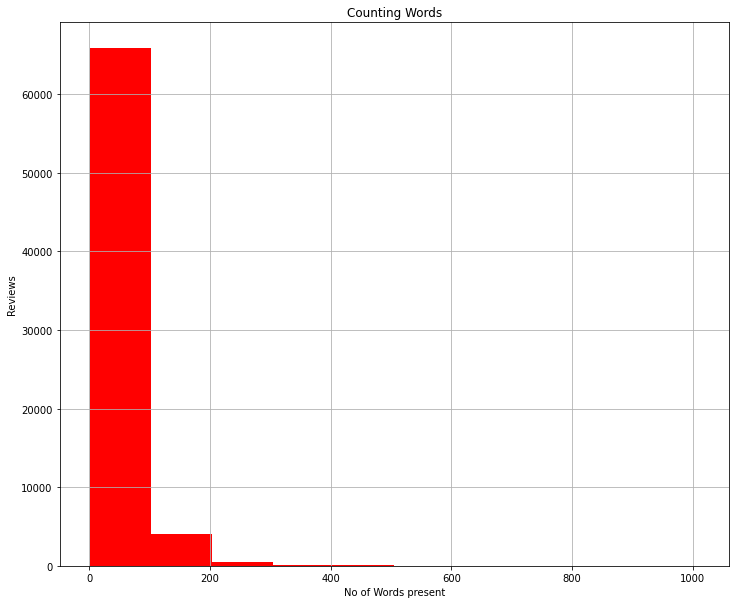

In [120]:
word_count(data['reviews.text']).hist(figsize=[12,10],color='red')

In [124]:
d=max(data['reviews.text'].str.split(" ").map(lambda x: len(x)))
print(d)

# the longest review has 1010 words

1010


In [125]:
d1=min(data['reviews.text'].str.split(" ").map(lambda x: len(x)))
print(d1)

# the smallest review has 1 word

1


In [126]:
d2=data['reviews.text'].str.split(" ").map(lambda x: len(x)).mean()
print(d2)

# Average word is 40

39.46298763892039


**Top 10 stopwords**

In [127]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def top_stopwords(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.figure(figsize=[12,8])
    sns.barplot(x=x,y=y,palette="crest")
    

In [ ]:
top_stopwords(data['reviews.text'])

####**Top Frequent Words**####

In [130]:

def remove_Stopwords(text ):
  stop_words = set(stopwords.words('english')) 
  words = word_tokenize( text.lower() ) 
  sentence = [w for w in words if not w in stop_words]
  return " ".join(sentence)

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()

In [131]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def freq_words(text):
    stop=list(stopwords.words('english'))
    text1=text.str.lower()
    new1= text1.str.split()
    #new1=str(new1.lower())
    new1=new1.values.tolist()
    corpus=[word for i in new1 for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(12,8))       
    sns.barplot(x=y,y=x)

**Top frequent words in reviews having rating == 5**

In [132]:
df1 = data[data['reviews.rating'] == 5]
df1['reviews.text'].count()

46215

In [133]:
df1['reviews.text'] = df1['reviews.text'].apply(clean_text)
df1['reviews.text'] = df1['reviews.text'].apply(remove_Stopwords)
df1['reviews.text'] = df1['reviews.text'].apply(lemmatize_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [134]:
freq_words(df1['reviews.text'])

**Top frequent words in reviews having rating == 1**

In [135]:
df2 = data[data['reviews.rating'] == 1]
df2['reviews.text'].count()

3676

In [136]:
df2['reviews.text'] = df2['reviews.text'].apply(clean_text)
df2['reviews.text'] = df2['reviews.text'].apply(remove_Stopwords)
df2['reviews.text'] = df2['reviews.text'].apply(lemmatize_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [137]:
freq_words(df2['reviews.text'])

**Top frequent words in reviews having rating == 5 ,4 ,3 (positive reviews)**

In [138]:
df3 = data[(data['reviews.rating'] == 5) | (data['reviews.rating'] == 4) | (data['reviews.rating'] == 3)] 
df3['reviews.text'].count()

65055

In [139]:
df3['reviews.text'] = df3['reviews.text'].apply(clean_text)
df3['reviews.text'] = df3['reviews.text'].apply(remove_Stopwords)
df3['reviews.text'] = df3['reviews.text'].apply(lemmatize_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

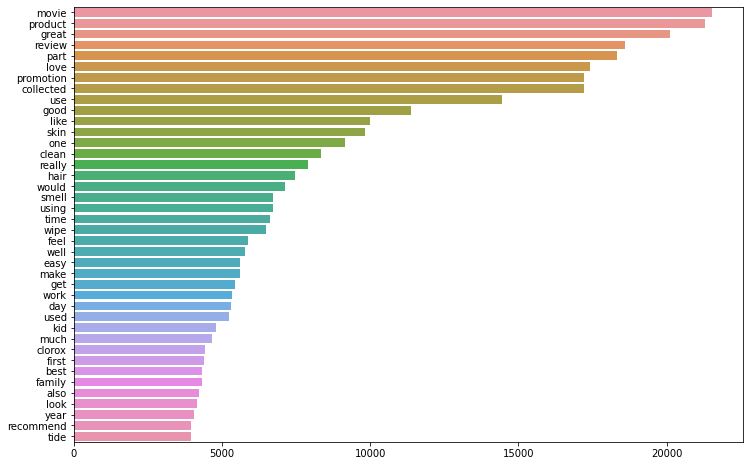

In [140]:
freq_words(df3['reviews.text'])

**Top frequent words in reviews having rating == 1 ,2 (Negative reviews)**

In [141]:
df4 = data[(data['reviews.rating'] == 1) | (data['reviews.rating'] == 2)] 
df4['reviews.text'].count()

5489

In [142]:
df4['reviews.text'] = df4['reviews.text'].apply(clean_text)
df4['reviews.text'] = df4['reviews.text'].apply(remove_Stopwords)
df4['reviews.text'] = df4['reviews.text'].apply(lemmatize_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

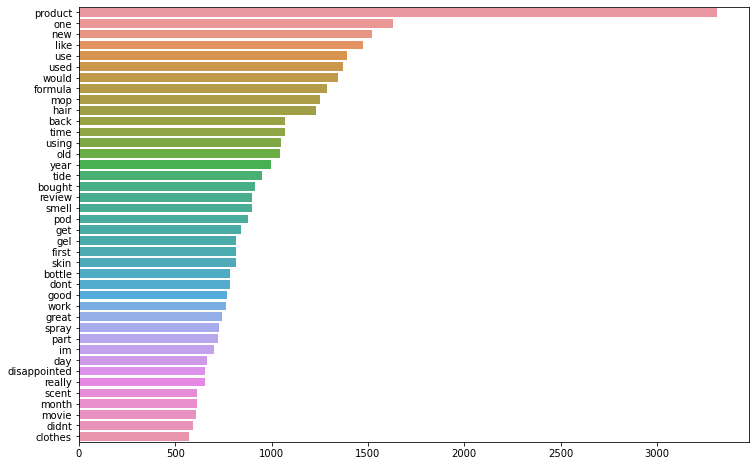

In [143]:
freq_words(df4['reviews.text'])

####**Word Cloud**####

In [144]:
df1=data.loc[data['reviews.rating'] == 1, 'reviews.text']
df2=data.loc[data['reviews.rating'] == 2, 'reviews.text']
df3=data.loc[data['reviews.rating'] == 3, 'reviews.text']
df4=data.loc[data['reviews.rating'] == 4, 'reviews.text']
df5=data.loc[data['reviews.rating'] == 5, 'reviews.text']

In [145]:
mask = (data["reviews.rating"] == 1) | (data["reviews.rating"] == 2)
df_rating1 = data[mask]
mask = (data["reviews.rating"]==4) | (data["reviews.rating"]==5) | (data["reviews.rating"]==3)
df_rating2 = data[mask]
print(len(df_rating1))
print(len(df_rating2))

5489
65055


In [146]:
type(mask)

pandas.core.series.Series

In [147]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [148]:
df_rating1['reviews.text'] = df_rating1['reviews.text'].apply(clean_text)
df_rating1['reviews.text'] = df_rating1['reviews.text'].apply(remove_Stopwords)
df_rating1['reviews.text'] = df_rating1['reviews.text'].apply(lemmatize_text)


df_rating2['reviews.text'] = df_rating2['reviews.text'].apply(clean_text)
df_rating2['reviews.text'] = df_rating2['reviews.text'].apply(remove_Stopwords)
df_rating2['reviews.text'] = df_rating2['reviews.text'].apply(lemmatize_text)

df_rating1['Num_words_text'] = df_rating1['reviews.text'].apply(lambda x:len(str(x).split())) 
df_rating2['Num_words_text'] = df_rating2['reviews.text'].apply(lambda x:len(str(x).split()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

**Word Cloud of Reviews-title based on positive and Negative rating**

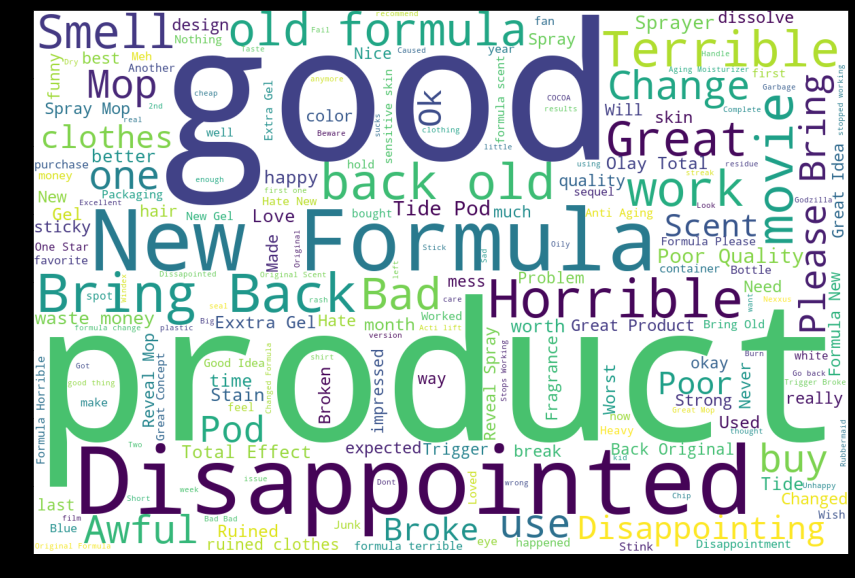

In [151]:
#Negative Title

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1200, height=800).generate(' '.join(df_rating1['reviews.title'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

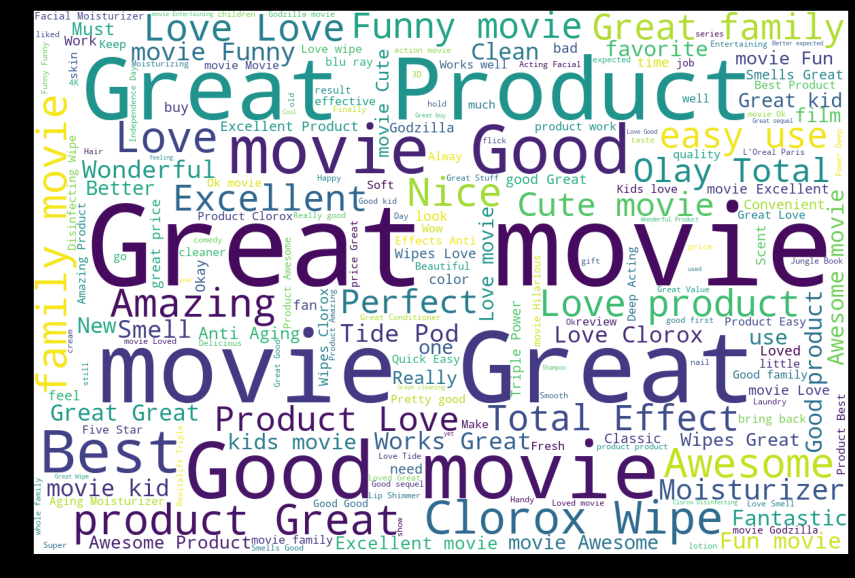

In [152]:
#Positive Title

wordcloud = WordCloud(background_color="white",width=1200, height=800).generate(' '.join(df_rating2['reviews.title'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

**Word Cloud of Reviews-text based on positive and Negative rating**

In [153]:
df_rating1['reviews.title'].head(20) #negative Reviews

3                                        Disappointed
4                                          Irritation
5                                        Not worth it
6                                       Disappointing
7                                    Not happy at all
8                                  Very disappointing
9                                           Don't buy
10                                pretty dissapoitned
11                                     Waste of Money
12                                     waste of money
13                        Not happy with this product
14                                       Disappointed
15                                Not what I expected
16                              Was so disappointed!!
17                                 very disappointed!
40    It has a nasty smell that would get anyone sick
41                                  Very bad reaction
42                          Not the quantity specifed
56                          

In [154]:
df_rating2['reviews.title'] .head(20)  # positive reviews

0                      Just Awesome
1                              Good
2                              Good
18                      Pretty nice
19                 First time using
20                      We love it!
21                       good times
22                     Does the job
23                            Loved
24                  Great sensation
25    That little extra something..
26                   Great Product!
27          Why wouldn't you try it
28                         Amazing!
29                          Amazing
30              Yummilicious And...
31              One of my favorites
32                       Hand cream
33       If you like lemon frosting
34                Someone stole it!
Name: reviews.title, dtype: object

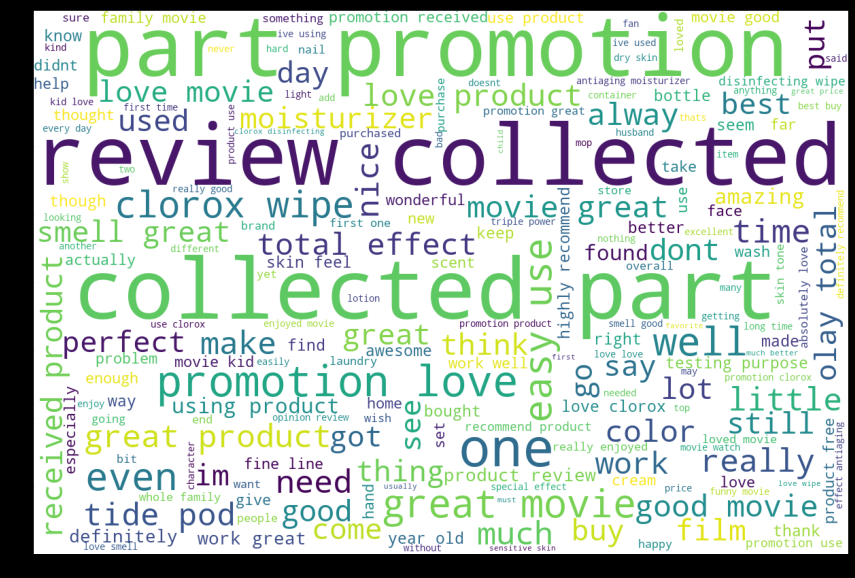

In [155]:
#Positive Reviews

wordcloud = WordCloud(background_color="white",width=1200, height=800).generate(' '.join(df_rating2['reviews.text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

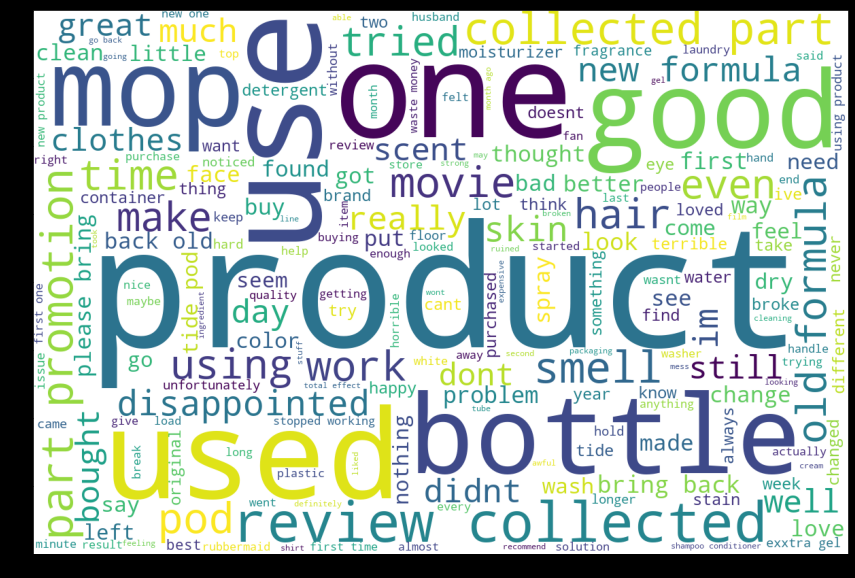

In [156]:
#Negative Reviews

wordcloud = WordCloud(background_color="white",width=1200, height=800).generate(' '.join(df_rating1['reviews.text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [157]:
from sklearn.feature_extraction.text import CountVectorizer
def plot_bigram(text, n=2):
    stop=set(stopwords.words('english'))
    text=text.str.lower()
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=[12,8])
    sns.barplot(x=y,y=x)

**Bi-gram of reviews.text**

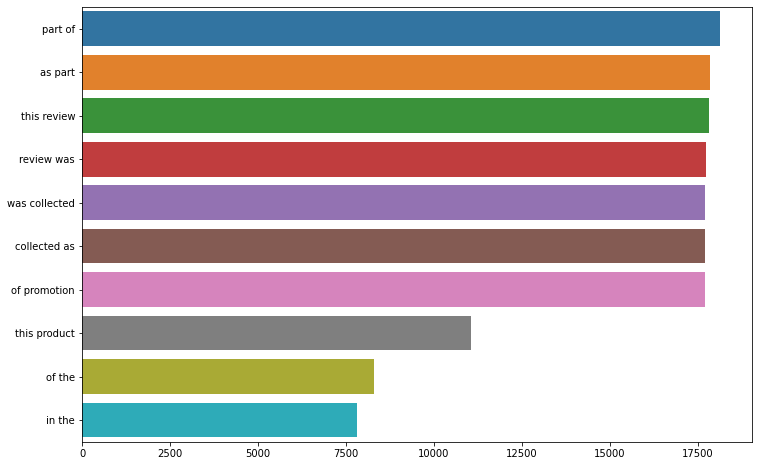

In [158]:
plot_bigram(data['reviews.text'],2)

**Tri-gram of reviews.text**

In [159]:
plot_bigram(data['reviews.text'],3)

**Quad-gram of reviews.text**

In [160]:
plot_bigram(data['reviews.text'],4)

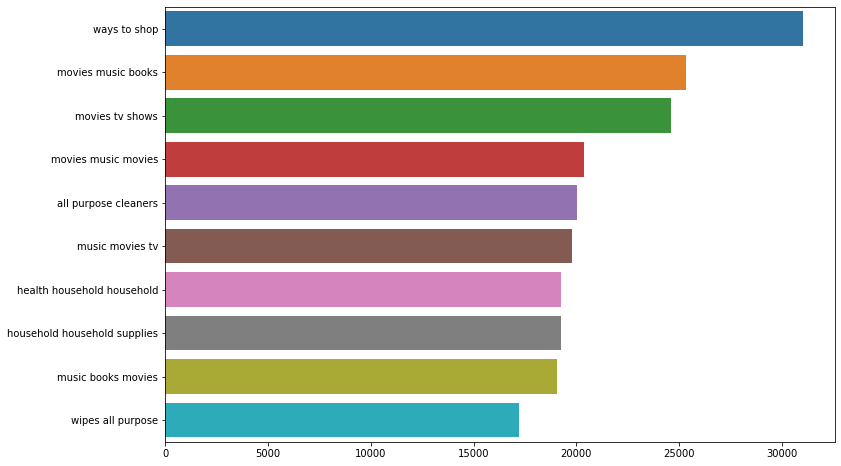

In [161]:
plot_bigram(data['categories'],3)

####**Named Entity Recognization (NER)**####

In [169]:
import spacy
nlp = spacy.load("en_core_web_sm")

def ner(text):
  doc = nlp(text)

  # Analyze syntax
  print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
  print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

  # Find named entities, phrases and concepts
  for entity in doc.ents:
    print(entity.text, entity.label_)
    
  #x,y=map(list,zip(*count))
  #sns.barplot(x=y,y=x)


In [170]:
# NER on longest review

In [171]:
ner(text)

Noun phrases: ['First, a disclaimer', 'sorts', 'I', 'a long-term', 'the-wool', 'I', 'Hoover', 'I', 'them', 'over 30 years', 'I', 'the-line', 'I', 'Hoover', 'their unsurpassed cleaning power', 'reliability', 'they', 'The Hoover WindTunnel U6439', 'I', 'the last several years', 'a Buick', 'it', 'a Buick', 'the weight category', 'it', 'a self-propelled model', 'I', 'I', 'training', 'order', 'my house', 'It', 'something', 'I', 'I', 'I', 'the strength', 'this bulky beast', 'my house', 'The WindTunnel controls', 'you', 'the brush', 'height', 'carpet', 'floor', 'levers', 'the brush housing', 'you', 'the machine', 'order', 'them', 'The HEPA filter', 'my old WindTunnel', 'the first few months', 'all manner', 'airborne particles', 'I', 'I', 'the filters', ', noise', 'my previous WindTunnel', 'something', 'a jet', 'I', 'a TV commercial', 'the Hoover Platinum series machines', 'I', 'I', 'the idea', 'two separate vacuums', 'one price', 'brilliant marketing idea', 'I', 'the power', 'a Hoover', 'some

####**Text Summarization**####

**Summary of largest review (1010 words)**

In [166]:
text=data['reviews.text'].loc[4591]


In [167]:
text

"First, a disclaimer of sorts . I'm a long-term, died-in-the-wool Hoover evangelist. No, I don't work for Hoover, but I've always used them religiously for over 30 years. I've tried switching off to other top-of-the-line brands, but I always return to Hoover for their unsurpassed cleaning power and reliability. That does not, however, mean they were perfect. The Hoover WindTunnel U6439 bagged upright that I've had for the last several years would suck up a Buick. Unfortunately, it also rivaled a Buick in the weight category. Although it's supposedly a self-propelled model, I felt like I had to go into training in order to vacuum my house. It became something I would put off because I wasn't sure I had the strength to wrestle this bulky beast all over my house. The WindTunnel controls which allow you to change the brush height from carpet to floor were manual, hard-to-move levers on the brush housing which required you to shut the machine off in order to properly manipulate them. The HE

In [172]:
from gensim.summarization.summarizer import summarize

# Summarize text using gensim
gen_summary=summarize(text)
print(gen_summary)

The Hoover WindTunnel U6439 bagged upright that I've had for the last several years would suck up a Buick.
The WindTunnel controls which allow you to change the brush height from carpet to floor were manual, hard-to-move levers on the brush housing which required you to shut the machine off in order to properly manipulate them.
Lastly, noise of my previous WindTunnel was something akin to a jet taking off.When I saw a TV commercial for the Hoover Platinum series machines, I was definitely intrigued.
But I was skeptical could the power of a Hoover truly be housed in something that weighs only 11 pounds I'd tried other lightweight vacuums in the past and their suction was dubious at best.
After removing everything, I was stunned at the weight or lack thereof for both machines.The physical appearance is very appealing the upright is sleek and slim with a 35' long cord, and the canister has tools-on-board, along with an ingenious shoulder strap so you can wear it while you vacuum.
Everyone

####**ANALYSIS - SUMMARY**####

**1) Reviews count of product purchase by customers = 3565 (Genuine)**

**2) Reviews are came from customers who don't purchase product =29482 (Fake)**

**3) Reviews which are nulls = 37997** 

**4) The longest review of length 5865 characters and 1010 words.**

**5) The smallest review of length 2 characters and 1 word.**

**6) The average review length is 209 characters  and 40 words approx.**

**7) Top frequent words in reviews having rating = 5 is "great, product , love , movie , review ,part , promotion**

**8) Top frequent words in reviews having rating =1 is "product , new ,old , formula , one ,used , like ,hair , old**

**9) The smallest categories is "Household-Essentials"**

**10) "Clorox" brand have Highest-Rating (avg) = 4.85 in top 15 brands.**

**11) "Nexxus" brand have lowest rating (avg) = 1.54 in top 15 brands.**

**12) Rating "5" has less review length .**




###**MACHINE - LEARNING**###

####**Unsupervised**####

#####**Topic Modelling**#####

**Topic Modelling on reviews**

**Using LDA Method**

In [174]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=85c69bfbf6198b9958c1856f09f4f10edc3242e269dd9abf92251379ff3daaf2
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [175]:

import gensim
import pyLDAvis
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim_models as gensimvis



def lda(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = gensimvis.prepare(lda_model, bow_corpus, dic)
    return vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [176]:
lda_model, bow_corpus, dic = lda(data['reviews.text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [177]:
lda_model.show_topics()

[(0,
  '0.015*"n\'t" + 0.012*"nail" + 0.011*"The" + 0.010*"product" + 0.009*"one" + 0.008*"like" + 0.008*"mop" + 0.008*"use" + 0.007*"would" + 0.007*"..."'),
 (1,
  '0.030*"product" + 0.027*"skin" + 0.024*"This" + 0.019*"review" + 0.017*"part" + 0.016*"promotion" + 0.016*"collected" + 0.013*"feel" + 0.013*"n\'t" + 0.012*"hair"'),
 (2,
  '0.068*"movie" + 0.021*"good" + 0.018*"great" + 0.014*"This" + 0.013*"kid" + 0.012*"The" + 0.012*"Great" + 0.011*"family" + 0.011*"one" + 0.009*"watch"'),
 (3,
  '0.038*"This" + 0.033*"part" + 0.031*"review" + 0.029*"promotion" + 0.029*"collected" + 0.028*"clean" + 0.027*"use" + 0.020*"Tide" + 0.019*"product" + 0.018*"love"')]

In [178]:
plot(lda_model, bow_corpus, dic)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.086040  0.112572       1        1  30.035901
0     -0.022782  0.126402       2        1  29.594428
2     -0.241370 -0.085243       3        1  20.665928
3      0.178112 -0.153731       4        1  19.703743, topic_info=        Term          Freq         Total Category  logprob  loglift
3313   movie  20784.000000  20784.000000  Default  30.0000  30.0000
23      part  17149.000000  17149.000000  Default  29.0000  29.0000
80      skin  11820.000000  11820.000000  Default  28.0000  28.0000
25    review  17394.000000  17394.000000  Default  27.0000  27.0000
31     clean   8009.000000   8009.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
1637    They   1643.594468   4265.772005   Topic4  -5.1712   0.6706
188     work   1693.328532   5643.817866   Topic4  -5.1414   0.4205
143    using   1575.340663   7601.362282   Topic4  -5.2136   0.0505
437   always   1449.336540   3156.723678   Topic4  -5.2969   0.8459
78      like   1454.603651  10804.238973   Topic4  -5.2933  -0.3808

[277 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
502       1  0.431833      've
502       2  0.452712      've
502       3  0.077131      've
502       4  0.038074      've
135       1  0.078647      ...
...     ...       ...      ...
501       1  0.998937  wrinkle
271       1  0.148268     year
271       2  0.522545     year
271       3  0.210009     year
271       4  0.119201     year

[388 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

**Topic modelling on Categories**

In [179]:
lda_model, bow_corpus, dic = lda(data['categories'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [180]:
lda_model.show_topics()

[(0,
  '0.051*"Mops" + 0.044*"Headphones" + 0.042*"Home" + 0.033*"Food" + 0.027*"Audio" + 0.026*"Rubbermaid" + 0.026*"Mop" + 0.026*"Mopping" + 0.025*"Storage" + 0.023*"Electronics"'),
 (1,
  '0.111*"Household" + 0.084*"Supplies" + 0.076*"Laundry" + 0.061*"Cleaning" + 0.046*"Essentials" + 0.035*"Cleaners" + 0.033*"Health" + 0.027*"Detergent" + 0.026*"Janitorial" + 0.025*"Industrial"'),
 (2,
  '0.110*"Care" + 0.088*"Beauty" + 0.077*"Moisturizers" + 0.050*"Personal" + 0.034*"Facial" + 0.034*"Health" + 0.028*"Skin" + 0.024*"Face" + 0.022*"Anti-Aging" + 0.020*"Nails"'),
 (3,
  '0.280*"Movies" + 0.090*"Music" + 0.038*"Shop" + 0.037*"Books" + 0.032*"Kids" + 0.027*"Shows" + 0.027*"Entertainment" + 0.026*"Ways" + 0.026*"Family" + 0.024*"Blu-Ray"')]

In [181]:
plot(lda_model, bow_corpus, dic)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.145725  0.125038       1        1  42.614816
3     -0.394034 -0.109996       2        1  29.634035
2      0.223309 -0.308544       3        1  17.406979
0      0.024999  0.293502       4        1  10.344170, topic_info=          Term           Freq          Total Category  logprob  loglift
8       Movies  167631.000000  167631.000000  Default  30.0000  30.0000
66   Household   96759.000000   96759.000000  Default  29.0000  29.0000
23        Care   58339.000000   58339.000000  Default  28.0000  28.0000
9        Music   53950.000000   53950.000000  Default  27.0000  27.0000
70    Supplies   72652.000000   72652.000000  Default  26.0000  26.0000
..         ...            ...            ...      ...      ...      ...
214        See    2757.618109    4603.301208   Topic4  -4.3275   1.7563
146    Kitchen    4152.770335   11377.693843   Topic4  -3.9181   1.2609
39        Shop    2587.765234   43428.032342   Topic4  -4.3911  -0.5516
660      Deals    1880.459717    4459.937655   Topic4  -4.7104   1.4051
45    Featured    1875.842298   29749.551787   Topic4  -4.7128  -0.4950

[194 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
176       1  0.195189  Accessories
176       3  0.382067  Accessories
176       4  0.422767  Accessories
335       2  0.999873       Action
336       2  0.999887    Adventure
...     ...       ...          ...
41        2  0.466519         Ways
41        3  0.020538         Ways
41        4  0.047321         Ways
1415      4  0.999772          Wet
590       1  0.999910        Wipes

[198 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

####**Supervised**####

In [188]:
data['reviews.text'].isnull().sum()

0

In [ ]:
#data.dropna(subset=['reviews.text'], inplace=True)


In [189]:
X=data['reviews.text']
y=data['reviews.rating']

In [190]:
X.head()

0    i love this album. it's very good. more to the...
1    Good flavor. This review was collected as part...
2                                         Good flavor.
3    I read through the reviews on here before look...
4    My husband bought this gel for us. The gel cau...
Name: reviews.text, dtype: object

In [191]:
y.head()

0    5
1    5
2    5
3    1
4    1
Name: reviews.rating, dtype: int64

In [193]:
X= X.apply(clean_text)
X = X.apply(remove_Stopwords)
X= X.apply(lemmatize_text)

In [195]:
X.head()

0    love album good hip hop side current pop sound...
1          good flavor review collected part promotion
2                                          good flavor
3    read review looking buying one couple lubrican...
4    husband bought gel u gel caused irritation fel...
Name: reviews.text, dtype: object

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report




In [198]:
X_vector=TfidfVectorizer().fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_vector,y,test_size=0.2, random_state=42)

#####**Logistic-Regression**#####

In [199]:

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression().fit(X_train, y_train)

y_pred=model1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring(

In [200]:

from sklearn import metrics
a=accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accurcacy: ",a)

[[ 479    6   21   22  196]
 [  77   15   35   49  176]
 [  45   11  142  243  370]
 [  28    4   81  664 2126]
 [  28    4   34  412 8841]]
              precision    recall  f1-score   support

           1       0.73      0.66      0.69       724
           2       0.38      0.04      0.08       352
           3       0.45      0.18      0.25       811
           4       0.48      0.23      0.31      2903
           5       0.76      0.95      0.84      9319

    accuracy                           0.72     14109
   macro avg       0.56      0.41      0.43     14109
weighted avg       0.67      0.72      0.67     14109

Accurcacy:  0.7187610744914593


#####**Decision-Tree**#####

In [201]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

y_pred=model2.predict(X_test)

b=accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accurcacy: ",b)

[[ 397   31   48   63  185]
 [  43   72   43   49  145]
 [  39   30  221  196  325]
 [  58   49  174 1015 1607]
 [ 139   68  218 1346 7548]]
              precision    recall  f1-score   support

           1       0.59      0.55      0.57       724
           2       0.29      0.20      0.24       352
           3       0.31      0.27      0.29       811
           4       0.38      0.35      0.36      2903
           5       0.77      0.81      0.79      9319

    accuracy                           0.66     14109
   macro avg       0.47      0.44      0.45     14109
weighted avg       0.64      0.66      0.65     14109

Accurcacy:  0.6558225246296691


#####**Random-Forest**#####

In [202]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(X_train,y_train)
#print('In Sample Accuracy: ', model.score(X_train, y_train))
y_pred=model3.predict(X_test)
c=accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accurcacy: ",c)

[[ 356    0    2    7  359]
 [  23   56    6   11  256]
 [  11    0  133   91  576]
 [   5    0   17  549 2332]
 [   5    0    9  130 9175]]
              precision    recall  f1-score   support

           1       0.89      0.49      0.63       724
           2       1.00      0.16      0.27       352
           3       0.80      0.16      0.27       811
           4       0.70      0.19      0.30      2903
           5       0.72      0.98      0.83      9319

    accuracy                           0.73     14109
   macro avg       0.82      0.40      0.46     14109
weighted avg       0.74      0.73      0.67     14109

Accurcacy:  0.7278332978949607


#####**Naive-Bayes**#####

In [203]:
from sklearn.naive_bayes import MultinomialNB
model4 = MultinomialNB()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
d=accuracy_score(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accurcacy: ",d)

[[  64    0    0    4  656]
 [   9    0    0   10  333]
 [   1    0    1   51  758]
 [   1    0    0   78 2824]
 [   2    0    1   54 9262]]
              precision    recall  f1-score   support

           1       0.83      0.09      0.16       724
           2       0.00      0.00      0.00       352
           3       0.50      0.00      0.00       811
           4       0.40      0.03      0.05      2903
           5       0.67      0.99      0.80      9319

    accuracy                           0.67     14109
   macro avg       0.48      0.22      0.20     14109
weighted avg       0.60      0.67      0.55     14109

Accurcacy:  0.6665957899213268


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#####**KNN**#####

In [204]:
from sklearn.neighbors import KNeighborsClassifier

model5= KNeighborsClassifier(n_neighbors=5, p=2)
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
e=accuracy_score(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accurcacy: ",e)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:498: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  counts = np.zeros(a_view.shape[:-1], dtype=np.int)


[[ 333   30   31  133  197]
 [  50   17   27  121  137]
 [  30   14  101  329  337]
 [  33   11   85 1061 1713]
 [  53   20  120 1646 7480]]
              precision    recall  f1-score   support

           1       0.67      0.46      0.54       724
           2       0.18      0.05      0.08       352
           3       0.28      0.12      0.17       811
           4       0.32      0.37      0.34      2903
           5       0.76      0.80      0.78      9319

    accuracy                           0.64     14109
   macro avg       0.44      0.36      0.38     14109
weighted avg       0.62      0.64      0.63     14109

Accurcacy:  0.6373236940959671


In [206]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = [71.87,65.58,72.78,66.65,63.73]
bars = ('Logistic Regression', 'Decision Tree', 'Random-Forest','Naive-Bayes', 'KNN')
plt.figure(figsize=(12,8))
y_pos = np.arange(len(bars))
bars = plt.bar(bars,height=accuracy, color=['red', 'blue', 'green', 'skyblue', 'purple'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 1,yval)


plt.xlabel("Classification Algorithms")
plt.ylabel("Accuracy in Percentage")
plt.title("Accuracy of Machine Learning Algorithms")
plt.show()

**Highhest Accuracy achieved by Random Forest 72.78**